-------------
    A/B testing( Practical implementation of two sample test)
------------

The idea of A/B testing is to present different content to different variants (user groups), gather their reactions and user behaviour and use the results to build product or marketing strategies in the future.

<img src = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*aPUSwnuyUsxF_ACHuxiDlA.png" width="850" height="450">

In AB test A: Test Group(on which we start the test of offer) B : Control group (there is no offer for this group)

Test the change in behavior of these group buyer.

In [5]:
data = [1,2,3,4,5]
data

[1, 2, 3, 4, 5]

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics 
import math
import scipy.stats as stats

In [7]:
# measure of central tendency
# mean , median, mode
np.mean(data)


3.0

In [8]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df['total_bill'].mean()

19.78594262295082

In [10]:
[1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]

In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
data

[1, 2, 3, 4, 5]

In [13]:
np.median(data)

3.0

In [14]:
data = [1, 2, 3, 4, 500]

In [15]:
np.mean(data)

102.0

In [16]:
np.median(data)

3.0

In [17]:
# so mean is inflated by outliers but median not

In [18]:
np.median(df.total_bill)

17.795

In [19]:
data = [1,2,3,3,3,3,4,500]

In [20]:
statistics.mode(data)

3

In [21]:
data

[1, 2, 3, 3, 3, 3, 4, 500]

In [22]:
np.percentile(data,[25]) # 25 percentage of the data below 2.75

array([2.75])

In [23]:
np.percentile(data,[25,50,75,96,97,98,99,100])

array([  2.75,   3.  ,   3.25, 361.12, 395.84, 430.56, 465.28, 500.  ])

In [24]:
data

[1, 2, 3, 3, 3, 3, 4, 500]

In [25]:
data.append(-500)

In [26]:
data

[1, 2, 3, 3, 3, 3, 4, 500, -500]

In [27]:
data = [1, 2, 3, 3, 3, 3, 4, 20, -20]

<Axes: >

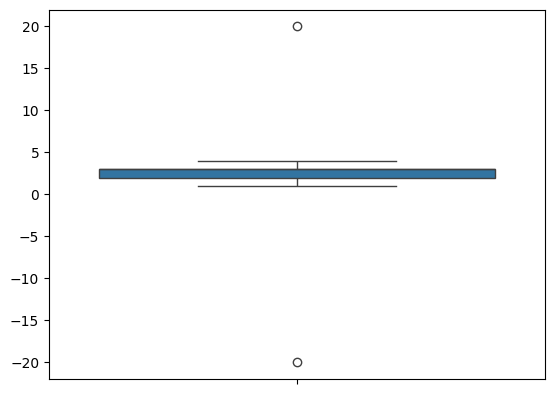

In [28]:
sns.boxplot(data=data)

In [29]:
# measures of dispersion
# std deviation and variance

data

[1, 2, 3, 3, 3, 3, 4, 20, -20]

In [30]:
np.var(data)

90.76543209876543

In [31]:
np.std(data)

9.527089382322673

In [32]:
statistics.variance(data) # sample variance where sample = n-1

102.11111111111111

In [33]:
statistics.pvariance(data) # variance for entire population

90.76543209876543

In [34]:
math.sqrt(statistics.pvariance(data)) # square root of variance is std deviation

9.527089382322673

In [35]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
# relationship b/w two feature
# correlation and covariance
df[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [37]:
df.corr(numeric_only=True)
# where there is one unit increase in total bill then there is 67% chance that tip will be increased.
# tip and size has a positive relationship with total bill

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

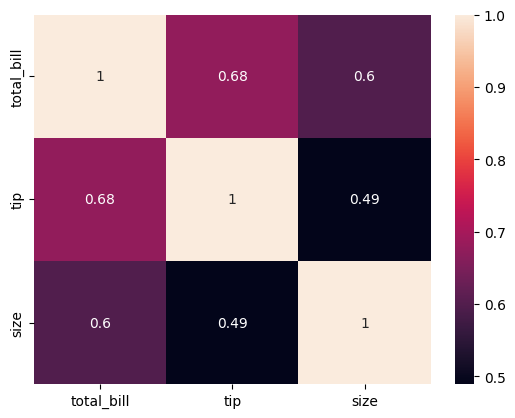

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [39]:
# covariance
df.cov(numeric_only=True)

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


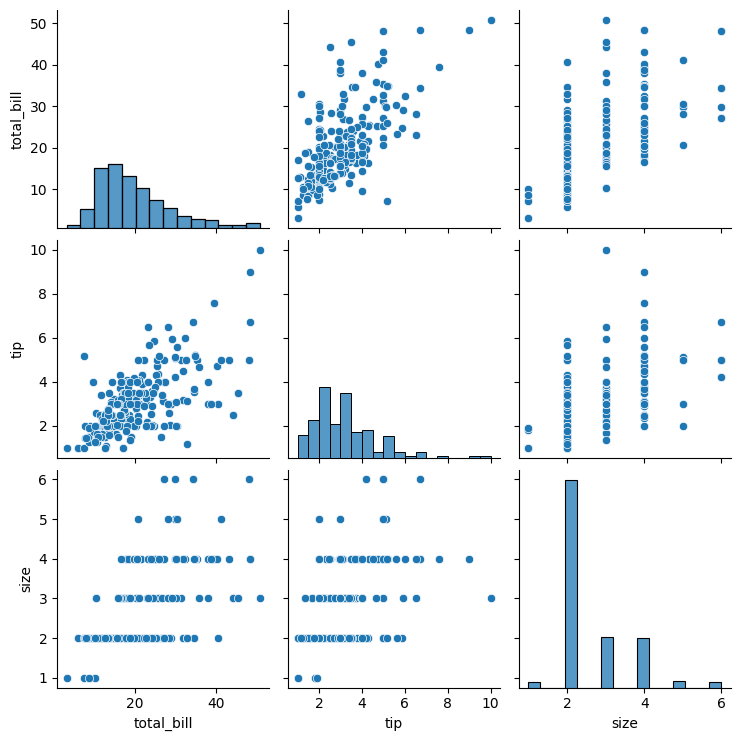

In [40]:
sns.pairplot(df)

<Axes: ylabel='Count'>

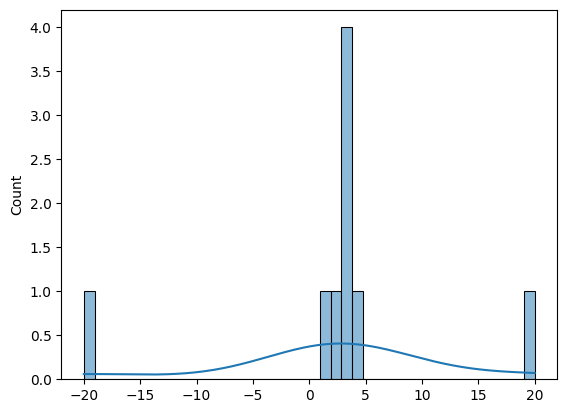

In [41]:
sns.histplot(data,kde=True)

<Axes: xlabel='total_bill', ylabel='Count'>

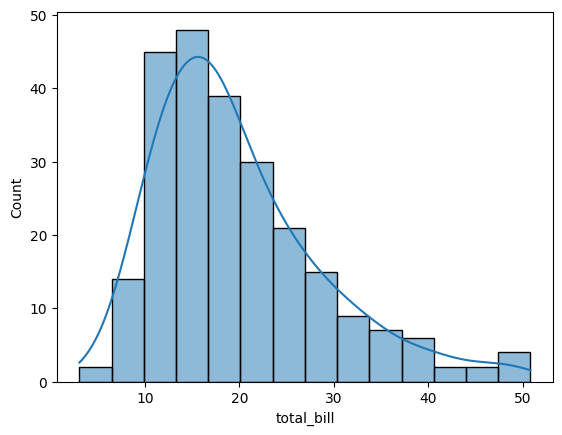

In [42]:
sns.histplot(df.total_bill, kde=True)

In [43]:
data1 = np.random.normal(0.5, 0.2, 1000)

C:\Users\avina\AppData\Local\Temp\ipykernel_18512\1727590720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1)


<Axes: ylabel='Density'>

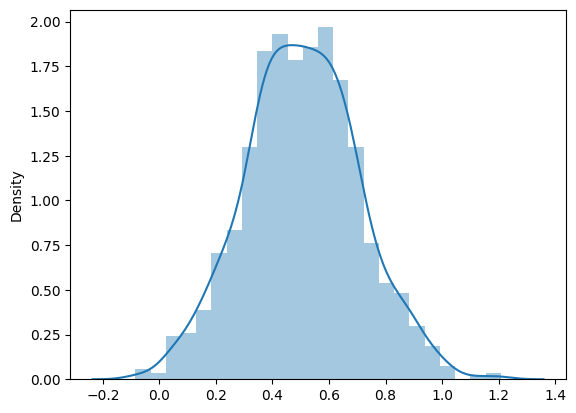

In [44]:
sns.distplot(data1)

In [45]:
population = np.random.randint(10, 20, 50)

In [46]:
population

array([11, 15, 12, 19, 13, 16, 14, 18, 16, 15, 16, 15, 11, 17, 15, 18, 16,
       19, 16, 11, 13, 12, 19, 18, 15, 15, 19, 16, 10, 10, 17, 10, 14, 10,
       16, 14, 17, 17, 17, 18, 18, 17, 13, 15, 16, 14, 14, 18, 18, 13])

In [47]:
len(population)

50

In [48]:
statistics.mode(population)

16

In [49]:
np.mean(population)

15.12

In [50]:
# random sample from data

In [51]:
sample1 = np.random.choice(population , 20)
sample2 = np.random.choice(population , 20)
sample3 = np.random.choice(population , 20)
sample4 = np.random.choice(population , 20)

In [52]:
mean_of_samples = []
all_samples = [sample1,sample2,sample3,sample4]
for sample in all_samples:
    mean_of_samples.append(np.mean(sample))

In [53]:
mean_of_samples

[14.95, 15.25, 14.25, 14.55]

In [54]:
# central limit theorem >> the sample mean will be approximated to normal distribution given sample size >= 30 
#and no fo samples should be sufficiently large

In [55]:
population = np.random.binomial(10, 0.5, 10000)

In [56]:
population

array([6, 5, 6, ..., 4, 5, 3])

C:\Users\avina\AppData\Local\Temp\ipykernel_18512\2958836585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(population)


<Axes: ylabel='Density'>

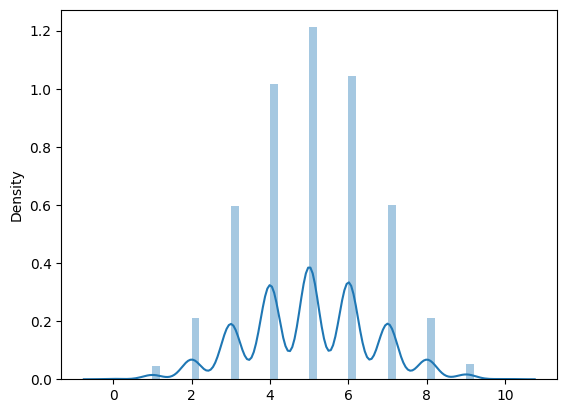

In [57]:
sns.distplot(population)

In [58]:
sample_size = 3000

mean_of_samples = []

for i in range(1,10000):
    sample = np.random.choice(population, size=sample_size)
    mean_of_samples.append(np.mean(sample))

In [59]:
mean_of_samples


[5.0,
 5.006666666666667,
 5.041,
 5.008333333333334,
 4.988333333333333,
 4.978,
 4.984,
 4.963,
 5.063,
 5.005333333333334,
 4.989,
 4.971333333333333,
 5.0183333333333335,
 4.972,
 5.006333333333333,
 4.999333333333333,
 5.046333333333333,
 5.026,
 5.019666666666667,
 5.089,
 5.021333333333334,
 4.983666666666666,
 5.022,
 5.011333333333333,
 5.0536666666666665,
 5.0216666666666665,
 4.976,
 5.002,
 5.002666666666666,
 5.046666666666667,
 5.023,
 5.007333333333333,
 4.918,
 5.066,
 5.0103333333333335,
 5.014666666666667,
 5.017666666666667,
 5.031333333333333,
 5.031333333333333,
 5.001666666666667,
 5.009333333333333,
 5.0056666666666665,
 5.006666666666667,
 5.010666666666666,
 4.991666666666666,
 5.001,
 4.988,
 5.002,
 5.004,
 5.049333333333333,
 5.019,
 5.085,
 5.052666666666667,
 5.020333333333333,
 5.001333333333333,
 5.007666666666666,
 5.026,
 5.041666666666667,
 5.041,
 5.058666666666666,
 5.089333333333333,
 5.020333333333333,
 4.985333333333333,
 4.975333333333333,
 4.99

C:\Users\avina\AppData\Local\Temp\ipykernel_18512\1480320140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_of_samples, kde=True, color='Red')


<Axes: ylabel='Density'>

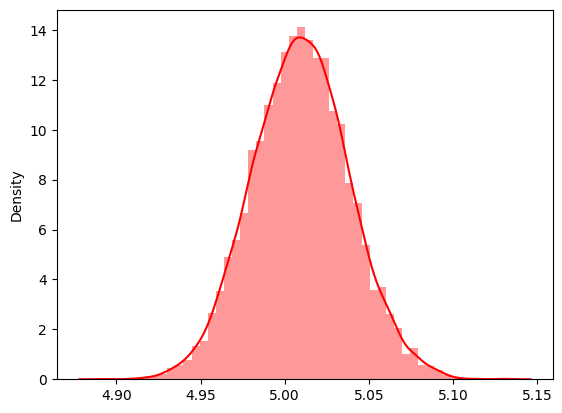

In [60]:
sns.distplot(mean_of_samples, kde=True, color='Red')

In [61]:
np.mean(mean_of_samples)

5.009603427009368

In [62]:
np.median(mean_of_samples)

5.009666666666667

In [63]:
statistics.mode(mean_of_samples)

5.021333333333334

In [64]:
# mean = median = mode as above value for normal distribution

In [65]:
stats.norm.ppf(q=0.95) # z critical with alpha as 1 -0.95 = 0.05 # 1-q
# zcritical for give alpha, ztable
z_critical = stats.norm.ppf(q=0.975)

In [66]:
# t distribution
# degree of freedom and confidence interval , t table
stats.t.ppf(df=24, q=1-0.97)



-1.973994288847133

In [67]:
margin_of_error = z_critical*np.std(mean_of_samples)/np.sqrt(20)

In [68]:
margin_of_error

0.012619851263282376

In [69]:
# confidence interval
np.mean(mean_of_samples)-margin_of_error, np.mean(mean_of_samples)+margin_of_error

(4.996983575746086, 5.02222327827265)

In [70]:
# Ztest

from numpy.random import randn
population = randn(3000)
population

array([ 0.67339589,  0.72854948,  0.01872615, ...,  1.53066199,
       -1.45599698,  0.87581165])

In [71]:
np.mean(population),np.std(population)

(-0.001307902691853904, 1.0197226572934655)

In [72]:
null_mean = 0.05 # claim

# if pvalue <=0.05 -- reject null hypothesis
# if pvalue >0.05 -- fail to reject null hypothesis

from statsmodels.stats.weightstats import  ztest


In [73]:
# alternative="larger" means the mean value is larger than null meam
zsore , pvalue = ztest(population, value=null_mean, alternative="larger")
if pvalue <= 0.05:
    print("Reject the H0")
else:
    print("fail to reject the H0")

fail to reject the H0


In [74]:
#A school calculated iq scores of 50 students, the average iq  turned out to be 100. the mean of population iq is 90 
#and the std deviation 16. \
#state whether the claim by school 
#that IQ increases if student study more than avg of school with 5% of significance level

#null hypothesis : mean_iq = 90
#Alternate: mean_iq > 90

In [75]:
#zcritical approach
import scipy.stats as stats

sample_mean = 100
population_mean = 90
population_std = 16
sample_size = 50
alpha = 0.05

In [76]:
zscore = (sample_mean - population_mean)/(population_std/np.sqrt(sample_size))

In [77]:
zscore

4.419417382415922

In [78]:
#stats module in scipy>>zcritical
#percent point function>>inverse of cdf
zcritical = stats.norm.ppf(1-alpha)

In [79]:
zcritical

1.6448536269514722

In [80]:
if zscore >= zcritical:
    print("Reject the h0")
else:
    print("fail to reject the h0")

Reject the h0


In [81]:
#pvalue approach using scipy

pvalue = 1-stats.norm.cdf(zscore)
pvalue

4.948367312573865e-06

In [82]:
if pvalue <= alpha:
    print("Reject the H0")
else:
    print("Fail to reject H0")

Reject the H0


In [83]:
# One sample t test

In [84]:
population = np.random.randint(10,50,50)

In [85]:
population

array([37, 16, 42, 45, 40, 14, 45, 47, 48, 29, 22, 44, 15, 36, 36, 39, 35,
       20, 16, 29, 23, 38, 27, 48, 17, 14, 11, 32, 16, 12, 15, 38, 30, 36,
       26, 31, 34, 37, 41, 42, 36, 31, 31, 24, 26, 43, 23, 49, 29, 15])

In [86]:
sample = np.random.choice(population,20)

In [87]:
np.mean(sample)

30.65

In [88]:
null_value = 25 # the mean population is 25
import scipy
scipy.stats.ttest_1samp(sample, null_mean)

TtestResult(statistic=10.443225041024569, pvalue=2.6054785495813642e-09, df=19)

In [89]:
# 2 sample t test

In [90]:
sample1 = np.random.choice(population,20)
sample2 = np.random.choice(population,20)

In [91]:
np.mean(sample1),np.mean(sample2)

(29.05, 28.1)

In [92]:
scipy.stats.ttest_ind(sample1,sample2)

TtestResult(statistic=0.2561530548826404, pvalue=0.7992143150288197, df=38.0)

In [93]:
# paired t test >> two sample from same population at different time interval
team_india_first_inning = [350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 380, 405, 430, 455, 480, 505]
team_india_second_inning = [310, 330, 360, 390, 420, 440, 470, 510, 540, 570, 610, 640, 670, 395, 425, 455, 485, 515, 545, 575]

np.mean(team_india_first_inning),np.mean(team_india_second_inning)

(491.5, 482.75)

In [94]:
import scipy.stats


scipy.stats.ttest_rel(team_india_first_inning,team_india_second_inning)

TtestResult(statistic=0.5197620916192276, pvalue=0.6092322925092784, df=19)

In [95]:
# how to know if the data is normally distributed or not ?
# make a distribution plot or q-q plot 
# chk for mean = median = mode
# statistical test for chking on data distribution

In [96]:
data  =  pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep=";")

In [97]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [98]:
pop = np.random.randn(1000)

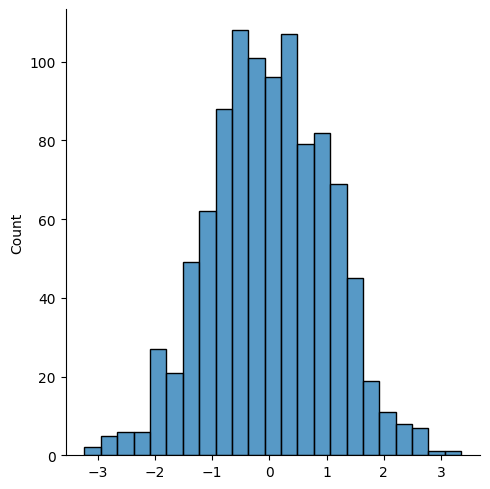

In [99]:
sns.displot(pop)

In [100]:
from scipy import stats
stats.shapiro(pop)

ShapiroResult(statistic=0.9987524915788416, pvalue=0.7236865479233643)

In [101]:
stats.shapiro(data['citric acid'])

ShapiroResult(statistic=0.9552919890668837, pvalue=1.0219317829705018e-21)

In [102]:
#pvalue is less than 0.05 and hence reject the h0 that the sample is drawn from a normal dist population

In [103]:
from scipy.stats import shapiro

# Assuming you have a dataset named 'data'
data = [350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 380, 405, 430, 455, 480, 505]

# Perform Shapiro-Wilk test
stat, p = shapiro(data)

# Print the test statistic and p-value
print("Test Statistic:", stat)
print("p-value:", p)


Test Statistic: 0.9560777863217667
p-value: 0.4687631372254954
